# Una nota

Gli handout di questo repository contengono sostanzialmente il materiale visto a lezione.

Ad esso può aggiungersi del **materiale supplementare** non mostrato a lezione il cui studio, 
pur non essendo strettamente parlando parte integrale del programma del corso, può costituire 
un interessante approfondimento e un utile riferimento per il progetto finale, o per le lezioni 
a venire. Tale materiale è indicato dalla dicitura `# materiale supplementare` posta all'inizio 
della cella di codice.

Similmente, alcuni handout (come questo), possono concludersi con una sezione **Homework** che
costituisce una raccolta di esercizi da svolgare a casa. Si tratta di esercizi facoltativi la 
cui soluzione non sarà valutata (per i quali, se necessario, il docente è comunque disponibile a 
fornire supporto) che possono rivelarsi utili alla comprensione degli argomenti a venire, o 
ad avere una più chiara percezione dello stato della propria preparazione.


# Tecnciche di programmazione

## Backtracking

In [1]:
from urllib.request import urlopen

with urlopen('https://raw.githubusercontent.com/napolux/paroleitaliane/master/paroleitaliane/60000_parole_italiane.txt') as inf:
    WORDS = frozenset(str(_, 'utf8').strip().upper() for _ in inf.readlines() if len(_) > 3)
    
print(len(WORDS))

60374


In [2]:
frase = 'CIAOMAMMABELLA'
prefisso = 'CIAO'
suffisso = frase[len(prefisso):]
for i in range(len(suffisso) + 1):
    print(suffisso[:i])


M
MA
MAM
MAMM
MAMMA
MAMMAB
MAMMABE
MAMMABEL
MAMMABELL
MAMMABELLA


In [3]:
%%time 

#@show_calls(False)
def bt(frase, solp):
    prefisso = ''.join(solp)
    if not frase.startswith(prefisso): return
    if len(prefisso) == len(frase):
        print(solp)
        return
    suffisso = frase[len(prefisso):]
    for i in range(len(suffisso) + 1):
        completamento = suffisso[:i]
        if completamento in WORDS:
            bt(frase, solp + [completamento])

bt('SALIREMODERATAMENTE', [])

['SAL', 'IRE', 'MODE', 'RATA', 'MENTE']
['SAL', 'IRE', 'MODERATA', 'MENTE']
['SALI', 'REM', 'ODE', 'RATA', 'MENTE']
['SALIRE', 'MODE', 'RATA', 'MENTE']
['SALIRE', 'MODERATA', 'MENTE']
CPU times: user 3 ms, sys: 108 µs, total: 3.11 ms
Wall time: 3.11 ms


In [4]:
%%time 

#@show_calls(False)
def bt_all_words(frase, solp):
    prefisso = ''.join(solp)
    if not frase.startswith(prefisso): return
    if len(prefisso) == len(frase):
        print(solp)
        return
    for completamento in WORDS:
        if completamento in WORDS:
            bt_all_words(frase, solp + [completamento])

bt_all_words('SALIREMODERATAMENTE', [])

['SAL', 'IRE', 'MODERATA', 'MENTE']
['SAL', 'IRE', 'MODE', 'RATA', 'MENTE']
['SALIRE', 'MODERATA', 'MENTE']
['SALIRE', 'MODE', 'RATA', 'MENTE']
['SALI', 'REM', 'ODE', 'RATA', 'MENTE']
CPU times: user 819 ms, sys: 12.9 ms, total: 832 ms
Wall time: 836 ms


In [5]:
def bt_rotta(frase, solp):
    prefisso = ''.join(solp)
    if prefisso == frase:
        print(solp)
        return
    for completamento in WORDS:
        if completamento in WORDS:
            bt_rotta(frase, solp + [completamento])

try: # catturo l'eccezione per evitare la stampa dell'errore
    bt_rotta(frase, [])
except RecursionError:
    print('Esaurito stack ricorsivo!')

Esaurito stack ricorsivo!


In [6]:
# materiale supplementare

# determinare tutti i sottoinsiemi di un insieme di numeri interi di somma assegnata

sol = set()
def subset_sum(X, subset, val):
    if sum(subset) > val: return
    if sum(subset) == val: 
        sol.add(frozenset(subset))
        return
    for x in X - subset:
        subset_sum(X - {x}, subset | {x}, val)
        
subset_sum({1, 6, 7, 3, 9, 4, 5, 2}, set(), 15)

for subset in sol: print(set(subset))

{2, 3, 4, 6}
{9, 6}
{2, 6, 7}
{1, 2, 5, 7}
{1, 2, 3, 4, 5}
{3, 5, 7}
{1, 5, 9}
{9, 2, 4}
{1, 3, 4, 7}
{1, 2, 3, 9}
{4, 5, 6}
{1, 3, 5, 6}


### Esempi supplementari

I curiosi possono sbirciare qualche esempio di backtracking tra i gist del docente, come ad esempio:

* calcolare la [densità delle soluzioni](https://gist.github.com/mapio/2c8b171110dc6a09dfd6) del [problema delle otto regine](https://en.wikipedia.org/wiki/Eight_queens_puzzle),

* enumerare le [soluzioni](https://gist.github.com/mapio/967f3d8793fcab80941dc0b4f370dbeb) del gioco [Find a way](https://play.google.com/store/apps/details?id=com.zerologicgames.findaway),

* trovare le [soluzioni](https://gist.github.com/mapio/33f1c381870333fe502e) del [Sudoku](https://en.wikipedia.org/wiki/Sudoku).

Si osservi che si tratta di codice spesso "sbrigativo" e non documentato, qui citato solo per incuriosire, non certo come materiale didattico.

# Strutture dati e algoritmi di base

## Alberi

* rappresentazione di alberi $n$-ari tramite *lol* (liste di liste),

A
[['B', ['D'], ['E']], ['C', ['F']]]


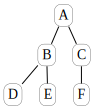

In [7]:
from liblet import Tree

a_tree = ['A', ['B', ['D'], ['E']], ['C', ['F']]]

root, *children = a_tree
print(root)
print(children)

Tree.from_lol(a_tree)

### Visite

* preordine, 
* postordine, 
* per livello.

In [8]:
def preorder(tree, visitor):
    root, *children = tree
    visitor(root)
    for child in children: preorder(child, visitor)
        
preorder(a_tree, print)

A
B
D
E
C
F


In [9]:
def postorder(tree, visitor):
    root, *children = tree
    for child in children: postorder(child, visitor)
    visitor(root)

result = []
postorder(a_tree, result.append)
result

['D', 'E', 'B', 'F', 'C', 'A']

In [10]:
def levelorder(tree, visitor):
    coda = [tree]
    while coda:
        tree = coda.pop(0)
        root, *children = tree
        visitor(root)
        for child in children: coda.append(child)
    

levelorder(a_tree, print)

A
B
C
D
E
F


## Grafi

* rappresentazione per *archi* (`tuple` di `tuple`) e *adiacenza* (`dict` di `tuple`).

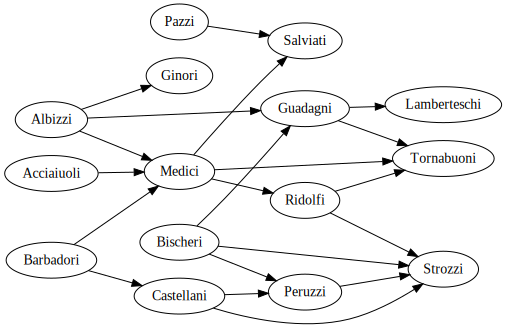

In [11]:
from liblet import LabelledGraph

# dati da: "Marriage and elite structure in Renaissance Florence, 1282-1500", di John F. Padget
# http://home.uchicago.edu/jpadgett/papers/unpublished/maelite.pdf

florentine_arcs = (
    ('Acciaiuoli', 'Medici'),
    ('Albizzi', 'Ginori'),
    ('Albizzi', 'Guadagni'),
    ('Albizzi', 'Medici'),
    ('Barbadori', 'Castellani'),
    ('Barbadori', 'Medici'),
    ('Bischeri', 'Guadagni'),
    ('Bischeri', 'Peruzzi'),
    ('Bischeri', 'Strozzi'),
    ('Castellani', 'Peruzzi'),
    ('Castellani', 'Strozzi'),
    ('Guadagni', 'Lamberteschi'),
    ('Guadagni', 'Tornabuoni'),
    ('Medici', 'Ridolfi'),
    ('Medici', 'Salviati'),
    ('Medici', 'Tornabuoni'),
    ('Pazzi', 'Salviati'),
    ('Peruzzi', 'Strozzi'),
    ('Ridolfi', 'Strozzi'),
    ('Ridolfi', 'Tornabuoni')
)

LabelledGraph(florentine_arcs)

In [12]:
def arcs2adj(arcs):
    adj = {}
    for src, dst in arcs:
        if not dst in adj: adj[dst] = []
        if src in adj:
            adj[src].append(dst)
        else:
            adj[src] = [dst]
    return adj


florentine_adj = arcs2adj(florentine_arcs)
florentine_adj

{'Medici': ['Ridolfi', 'Salviati', 'Tornabuoni'],
 'Acciaiuoli': ['Medici'],
 'Ginori': [],
 'Albizzi': ['Ginori', 'Guadagni', 'Medici'],
 'Guadagni': ['Lamberteschi', 'Tornabuoni'],
 'Castellani': ['Peruzzi', 'Strozzi'],
 'Barbadori': ['Castellani', 'Medici'],
 'Bischeri': ['Guadagni', 'Peruzzi', 'Strozzi'],
 'Peruzzi': ['Strozzi'],
 'Strozzi': [],
 'Lamberteschi': [],
 'Tornabuoni': [],
 'Ridolfi': ['Strozzi', 'Tornabuoni'],
 'Salviati': [],
 'Pazzi': ['Salviati']}

### Visite

* ampiezza,
* profondità.

In [13]:
def breadthfirst(adj, start, visitor):
    coda = [start]
    seen = set(coda)
    while coda:
        node = coda.pop(0)
        visitor(node)
        for dst in adj[node]:
            if not dst in seen:
                seen.add(dst)
                coda.append(dst)

breadthfirst(florentine_adj, 'Acciaiuoli', print)              

Acciaiuoli
Medici
Ridolfi
Salviati
Tornabuoni
Strozzi


In [14]:
def depthfirst(adj, start, visitor):
    def visit(node):
        visitor(node)
        for dst in adj[node]:
            if not dst in seen: 
                seen.add(dst)
                visit(dst)
    seen = set([start])
    visit(start)
            
depthfirst(florentine_adj, 'Acciaiuoli', print)

Acciaiuoli
Medici
Ridolfi
Strozzi
Tornabuoni
Salviati


# Un primo esempio di parsing: EABCP

* definizione "ricorsiva"

Una *EABCP* (espressione aritmetica completamente parentesizzata) è:

* un numero, oppure 
* `(` seguita da una *EABCP*, seguita da `+` o `*`, seguito da una *EABCP*, seguita da `)`.

## Tokenizzare

Tre approcci, usando:

* gli spazi (imponendo un formato specifico alla stringa)
* gli indici (e 1 lookahead),
* le espressioni regolari.

In [15]:
def tokenizer(chars):
    tokens = iter(chars.split())
    def next_token():
        return next(tokens, None)
    return next_token

next_token = tokenizer('( ( 34 * 7 ) + 2 )')

while True:
    token = next_token()
    if token is None: break
    print(f'<{token}>', end = ' ')

<(> <(> <34> <*> <7> <)> <+> <2> <)> 

In [16]:
# materiale supplementare

# con 1 lookahead
def tokenizer(chars):
    i = 0
    def next_token():
        nonlocal i
          
        while i < len(chars) and chars[i] == ' ': i += 1
        if i == len(chars): return None
        
        v = ''
        while i < len(chars) and chars[i] in '0123456789':
            v += chars[i]
            i += 1
        if v: return v
        
        i += 1
        return chars[i - 1]
    
    return next_token

next_token = tokenizer('((123 +4 ) * 56) + 2)')       

while True:
    token = next_token()
    if token is None: break 
    print(f'<{token}>', end = ' ')

<(> <(> <123> <+> <4> <)> <*> <56> <)> <+> <2> <)> 

## Parsing

* costruzione dell'*AST*,
* *valutazione* dell'espressione (con una *dispatch table*),
* *tradurre* (e valutare) l'espressione in RPN.

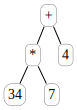

In [17]:
# costruzione dell'AST

def ast_eabcp(tokens):
    token = next(tokens, None)
    if token == '(':
        left = ast_eabcp(tokens)
        op = next(tokens)
        right = ast_eabcp(tokens)
        paren = next(tokens)
        return [op, left, right]
    else:
        return [int(token)]
    
ast = ast_eabcp(iter('( ( 34 * 7 ) + 4 )'.split()))
Tree.from_lol(ast)

In [18]:
# valutazione a partire dall'AST usando una dispatch table

from operator import add, mul

DISPATCH_TABLE = {'+': add, '*': mul}

def evaluate_eabcp(ast):
    root, *children = ast
    if not children: return root
    left = evaluate_eabcp(children[0])
    right = evaluate_eabcp(children[1])
    return DISPATCH_TABLE[root](left, right)
    
evaluate_eabcp(ast)

242

In [19]:
# materiale supplementare

# traduzione in rpn https://en.wikipedia.org/wiki/Reverse_Polish_notation

def rpn_eabcp(next_token):
    token = next_token()
    if token == '(':
        left = rpn_eabcp(next_token)
        op = next_token()
        right = rpn_eabcp(next_token)
        closed_paren = next_token()
        return left + right + (op, )
    else:
        return (int(token), )
    
rpn = rpn_eabcp(tokenizer('((3 * 4) + 2)'))
print(rpn)


# valutazione a pila https://en.wikipedia.org/wiki/Reverse_Polish_notation#Postfix_evaluation_algorithm

from collections import deque

def eval_rpn(lst):
    rpn = deque(lst)
    next_token = rpn.popleft
    stack = deque()
    push = stack.append
    pop = stack.pop
    while rpn:
        t = next_token()
        if t in DISPATCH_TABLE:
            right = pop()
            left = pop()
            push(DISPATCH_TABLE[t](left, right))
        else:
            push(t)
    return stack[0]
        
eval_rpn(rpn)

(3, 4, '*', 2, '+')


14

# Homework

## Dispatch table

Dato un certo insieme di tipi di figure geometriche (diciamo almeno `quadrato`, 
`rettangolo`, `triangolo`) scrivere un segmento di codice che, data una sequenza 
di figure accompagnate dalla dimensione dei rispettivi lati e codificata come una 
sequenza di linee di testo ne calcoli l'area complessiva.

Ad esempio, data la sequenza

    quadrato 5
    rettangolo 4 2
    triangolo 1 2 
    triangolo 2 1
    rettangolo 5 1
    quadrato 2

il codice deve emettere `44.0`. Usate una *dispatch table* che, data una figura, fornisca la 
funzione che ne calcola l'area. 

Data una sequenza di linee in una stringa è possibile ottenere un iteratore sulle linee 
applicando il metodo `splitlines` e data una stringa contenente una sequenza di parti separate 
da spazio è possibile ottenerle applicando il metodo `split`.

## Quadrati latini

Un [quadrato latino](https://en.wikipedia.org/wiki/Latin_square) di dimensione $n$ è una 
matrice quadrata di $n \times n$ interi tale che ogni riga e colonna sono una permutazione degli
interi tra $0$ e $n-1$; un tale quadrato si dice in forma *normale* (o *ridotta*) se gli nteri
sulla prima colonna e sulla prima riga sono in ordine natuarle.

I quadrati latini di dimensione 4 in forma normale sono

    0123    0123    0123    0123
    1032    1032    1230    1302
    2301    2310    2301    2031
    3210    3201    3012    3210
    
Scrivete una funzione ricorsiva che, facendo uso della tecnica del *backtracking* emetta tutti 
i quadrati latini in forma normale di dimensione data.

Fate attenzione perché il numero di tali quadrati cresce molto rapidamente, il loro numero (al crescere di $n$) è dato dalla successione 

    1, 1, 1, 4, 56, 9408, 16942080, 535281401856, 377597570964258816, 7580721483160132811489280…
    